# PyTorch Workflow
#coding/python #coding/deeplearning

**References**
- [YT: Learn PyTorch for Deep Learing](https://www.youtube.com/watch?v=Z_ikDlimN6A&list=PL-_aSYgSSJ7_UFn5bgZEhlMhNmXCXe26F&index=2&t=15419s)
- [LearnPytorch.io](https://www.learnpytorch.io/01_pytorch_workflow/)

## 01 Introduction to PyTorch Workflow
Workflow
1. Data Preparation
2. Build Model
3. Training Model
4. Inference (Make predictions)
5. Saving and Loading a Model 

## 02 Getting setup

In [85]:
import torch
from torch import nn
# nn are basic building blocks for graphs
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'2.0.0+cpu'

## 03 Creating a dataset with linear regression
1. Get data into a numerical representation
2. Build model to learn patterns from the representation

In [86]:
# Create **known** parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## 04 Creating training and test sets (the most important concept in ML)
**Splitting data into training and test sets**
Three datasets
- training set: where model learns patterns (60%~80%)
- validation set: tune model patterns
- test set: see if model is ready of the wild (10%~20%)

**Generalisation**
ability for a ML model to perform well on data it hasn't seen before

In [87]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## 05 Creating our first PyTorch model


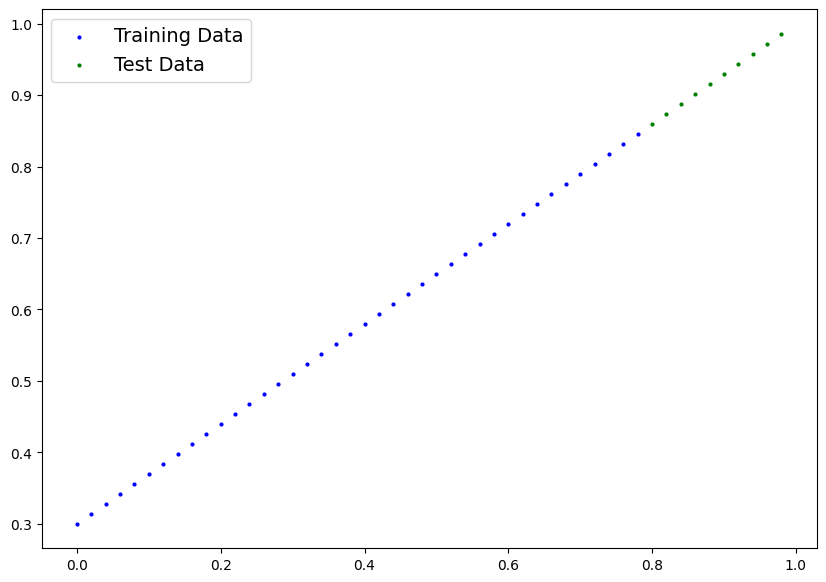

In [88]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train, 
                      test_data=X_test, 
                      test_labels=y_test, 
                      predictions=None):

  """ 
  Plots training data, 
  """
  plt.figure(figsize=(10,7))
  # Plot training in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  # Plot test in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")
  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # SHow the legend
  plt.legend(prop={"size":14})

plot_predictions(X_train, y_train, X_test, y_test, None)

## 06 Discussing important model building classes

What the model does:
- start with random values (weight and bias)
- Look at training data and adjust the random values to better represent the ideal values

How does the model do it:
1. Gradient descent (reason for `requires_grad=True`)
2. Back-propagation

In [89]:
# Create linear regression mdoel class
class LinearRegressionModel(nn.Module):
  # almost everything in torch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias    


## 07 Checking out the internals of our model
1. Subclasses `nn.Module`
2. initialise model parameters (layers, single parameters)
3. `requires_grade=True` means torch will track gradients of specific parameter
4. Any subclass of `nn.Module` needs to override `forward()` to define the forward computation of the model

**PyTorch Model-building essentials**
- **torch.nn**
- **torch.nn.Parameter** = what parameter should the model try and learn
- **torch.nn.Module** - base class for all nn modules, if subclassed, the `forward()` method should be overridden
- **torch.optim** - this is where the optimizers in PyTorch live
- **def forward()** - what happens in forward calculation

**Checking the contents of the PyTorch model**
- check model usign `.parameters()`

In [90]:
# Create a random seed (for reproducible results!)
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check-out model parameters
list(model_0.parameters())

# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

## 08 Making predictions with our model
Making predictions using `torch.inference_mode()`

In [91]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# Alternative, however infrerence mode is preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

## 09 Training a model with PyTorch (intuition building)

The whole idea of training is for a model to move from some unknown parameters to some *known* parameters.

One way to measure how poor a model creates predictions is via loss functions (cost function/criterion). Note: lower is better

Things we need to train
- Loss Function: measures how wrong the model's precitions are
- Optimiser: takes into account the loss of a model and adjusts the model's parameters (eg weights and bias) to improve the loss function resuults

For PyTorch, we need:
- a training loop
- a testing loop

## 10 Setting up a loss function and optimizer
Typical loss functions
- nn.L1Loss
- nn.MSELoss

Typical optimisers
- torch.optim.SGD (most popular)
- torch.optim.Adam

Goals
- we want to minimize the difference between y_pred and actual y

In [92]:
# Check out the model's parameters
model_0.state_dict()

# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimiser
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# learning rate - possibly most important hyperparameter (defines which decimal of the weight is optimised, lower is better but also more calc-intensive)


## 11 PyTorch training loop intuition
Building a training loop (and testing loop) in PyTorch

Steps
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions - aka Forward Propagation
2. Calculate the loss (compare FP predictions to ground-truth labels)
3. Optimizer zero grad
4. Loss backward - move backward through the network to calculate the gradients of each of the parameters of our model wrt to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters and try and improve the loss (**gradient descent**)

In [93]:
# An epoch is one loop throguh the data
# (this is a hyperparameter because we set it ourselves)
epochs = 1000

# Step 0
def train_model(epochs=1):
  for epcoh in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode sets all params that requires grad to replace grad
    
    # 1. Forward  pass
    y_preds = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_preds, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backprop on the loss wrt to model params
    loss.backward()

    # 5. Step the optimizer (perform the gradient descent)
    optimizer.step() 
      # by default how the optimizer changes will accumulate through the loop
      # so we have to zero them above in step 3

    model_0.eval() # turns off gradient tracking
    
    # print(model_0.state_dict())


## 12 Running our training loop epoch by epoch
Read more: 
- [ ] Learning rate scheduling

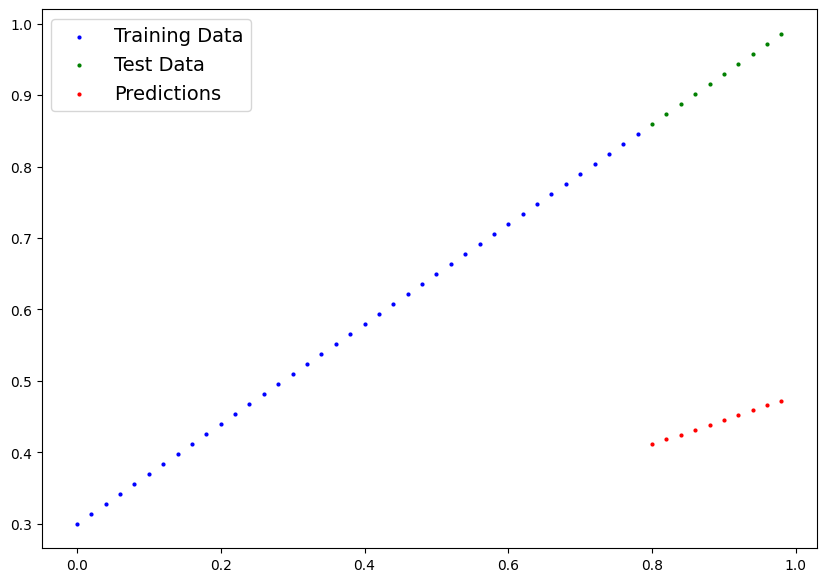

In [94]:
train_model(1) # Train the model, specifying the epoch
with torch.inference_mode():
  y_preds = model_0(X_test) # Make predictions
plot_predictions(predictions=y_preds) # Plot predictions


## 13 Writing testing loop code

- `model.eval()` is used for testing
- turns off different settings in the model not needed for evaluation/testing
- eg dropout layers, batch norm layers
- set `torch.inference_mode()` to turn off gradient 

Steps:
0. Turn on inference_mode
1. Do forward pass

Epoch: 0 | Loss: 0.3013603389263153 | Test Loss: 0.4675942063331604
Epoch: 10 | Loss: 0.18615034222602844 | Test Loss: 0.3328842222690582
Epoch: 20 | Loss: 0.08227583020925522 | Test Loss: 0.2069590985774994
Epoch: 30 | Loss: 0.05181945487856865 | Test Loss: 0.14023718237876892
Epoch: 40 | Loss: 0.04503796249628067 | Test Loss: 0.11182951927185059
Epoch: 50 | Loss: 0.04132963344454765 | Test Loss: 0.09809747338294983
Epoch: 60 | Loss: 0.03785243630409241 | Test Loss: 0.08776430785655975
Epoch: 70 | Loss: 0.03441363573074341 | Test Loss: 0.0794917643070221
Epoch: 80 | Loss: 0.030979642644524574 | Test Loss: 0.07190609723329544
Epoch: 90 | Loss: 0.02754882536828518 | Test Loss: 0.06363357603549957


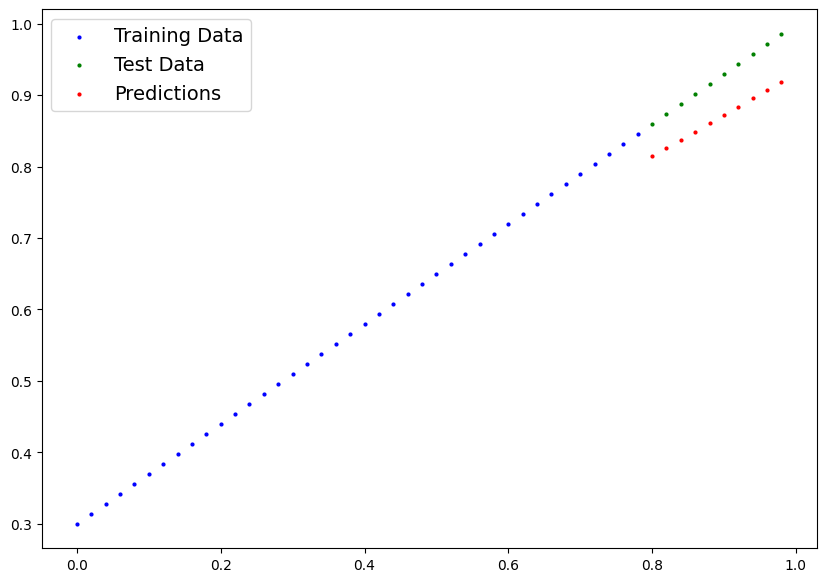

In [95]:
epochs = 100

# Tracking values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train() # train mode sets all params that requires grad to replace grad
  y_preds = model_0(X_train)
  loss = loss_fn(y_preds, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() 

  model_0.eval()

  with torch.inference_mode():
    # 1. Do forward pass
    test_pred = model_0(X_test)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out events
  epoch_count.append(epoch)
  loss_values.append(loss)
  test_loss_values.append(test_loss)
  
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

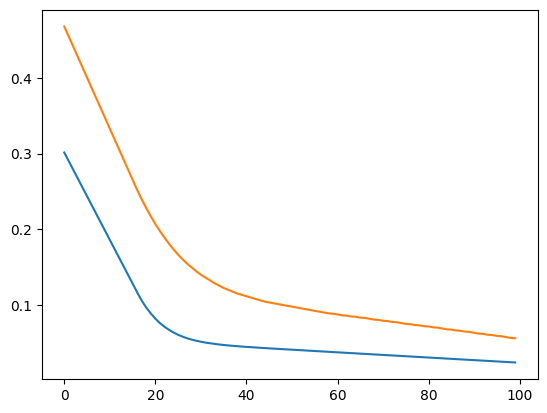

In [96]:
import numpy as np
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")

## 14 Saving/loading a model

Three main methods for saving and loading models
- `torch.save()` - saves in python pickle format
- `torch.load()` - load a saved torch object
- `torch.nn.Module.load_state_dict()` - this allows to load a model's  saved state dict

Read more:
- [ ] Saving & Loading Models (pytorch docs)

In [97]:
# Saving torch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" # typical extension for python objects
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [99]:
# Loading torch model
# create a new instance of the model class and load the state_dict
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

## 15 Putting everything together

### A. Data Preparation

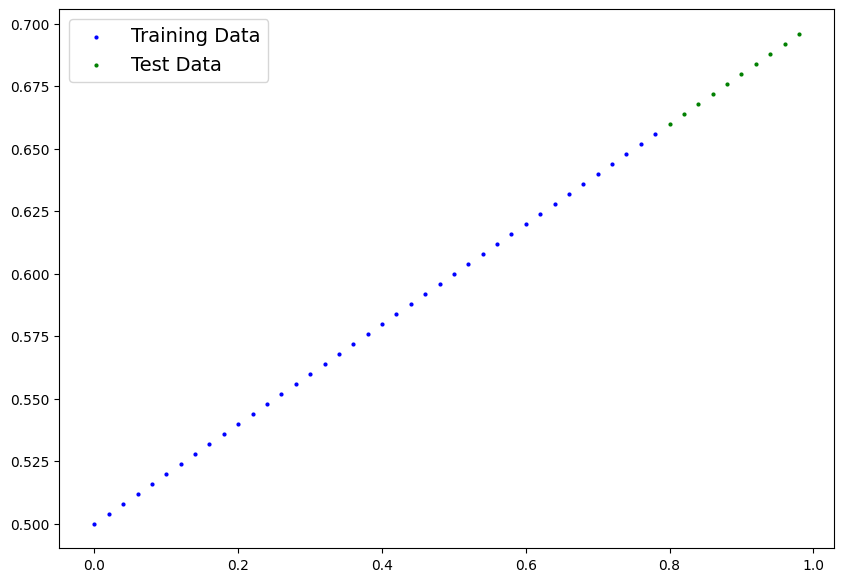

In [100]:
# Create data
weight = 0.2
bias = 0.5

# Create range values
start = 0
end = 1
step = 0.02

# Create x and y
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

# Split data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

### B. Building the Model

In [102]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
      super().__init__()
      # Use nn.Linear() for creating the model parameters\
      # a.k.a. linear transform, dense layer,
      self.linear_layer = nn.Linear(in_features=1, out_features=1) # layers can usually initialise the params
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

### C. Train the Model

In [109]:
# Check the model current device
next(model_1.parameters()).device

# Set model to use target device
# model_1.to(device)
# next(model_1.parameters()).device()

# Training
'''
loss function
optimizer
training loop
testing loop
'''

# Setup loss function
loss_fn = nn.L1Loss() # same as MAE
# Setup our optimiser
optimizer  = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

# Let's write a training loop
torch.manual_seed(42)
epochs = 200
for epoch in range(epochs):
  model_1.train()
  # Forward pass
  y_pred = model_1(X_train)
  # Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # Optimizer zero grad
  optimizer.zero_grad()
  # Perform backpropagation
  loss.backward()
  # Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Logs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} ")

model_1.state_dict()

Epoch: 0 | Loss: 0.0060448842123150826 | Test Loss: 0.007951927371323109 
Epoch: 10 | Loss: 0.0007041923818178475 | Test Loss: 0.0015715420013293624 
Epoch: 20 | Loss: 0.0003603108343668282 | Test Loss: 0.0007442831993103027 
Epoch: 30 | Loss: 0.0007550508016720414 | Test Loss: 0.00014541149721480906 
Epoch: 40 | Loss: 0.0007550508016720414 | Test Loss: 0.00014541149721480906 
Epoch: 50 | Loss: 0.0007550508016720414 | Test Loss: 0.00014541149721480906 
Epoch: 60 | Loss: 0.0007550508016720414 | Test Loss: 0.00014541149721480906 
Epoch: 70 | Loss: 0.0007550508016720414 | Test Loss: 0.00014541149721480906 
Epoch: 80 | Loss: 0.0007550508016720414 | Test Loss: 0.00014541149721480906 
Epoch: 90 | Loss: 0.0007550508016720414 | Test Loss: 0.00014541149721480906 
Epoch: 100 | Loss: 0.0007550508016720414 | Test Loss: 0.00014541149721480906 
Epoch: 110 | Loss: 0.0007550508016720414 | Test Loss: 0.00014541149721480906 
Epoch: 120 | Loss: 0.0007550508016720414 | Test Loss: 0.00014541149721480906 
E

OrderedDict([('linear_layer.weight', tensor([[0.2009]])),
             ('linear_layer.bias', tensor([0.5004]))])

### D. Making and Evaluating Predictions

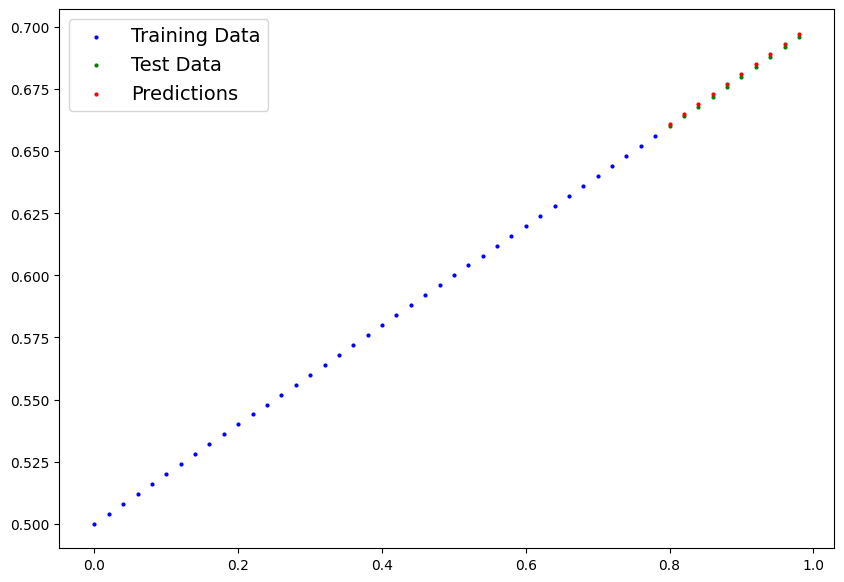

In [111]:
# Turn model into eval mode
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)

### E. Save & Load the Model

In [113]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01-pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)
